# Model 1 Calculate Calories

## Import Library

In [1]:
import pandas as pd
import numpy as  np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
df = pd.read_csv('../data/Diet Plan Recommendation/cleaned_dataset.csv')

In [3]:
df.head()

,age,weight(kg),height(cm),gender,BMI,BMR,activity_level,calories_to_maintain_weight
0,2,16.097862,93.202488,1,18.531612,958.584,1.2,1150.3008
1,4,14.619374,91.668688,1,17.397496,932.383,1.7,1585.0511
2,4,17.899918,99.728772,1,17.997414,977.578,1.9,1857.3982
3,3,13.532880,102.278630,1,12.936609,944.689,1.9,1794.9091
4,4,17.039484,105.397666,0,15.338909,799.229,1.9,1518.5351


In [4]:
#predict calories_to_maintain_weight

x1_train = df[['age', 'height(cm)', 'weight(kg)', 'gender',	'BMI',	'BMR',	'activity_level']]
y1_train = df['calories_to_maintain_weight']

In [5]:
#predict BMR

x2_train = df[['age', 'height(cm)', 'weight(kg)', 'gender']]
y2_train = df['BMR']

## Scale/Normalize The Training Data

### calories to maintain weight model

In [6]:
# Normalize the training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x1_train)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_train_scaled, y1_train, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, batch_size=300, epochs=100, validation_split=0.2) # Adjust epochs as needed

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss}, Mean Absolute Error: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Epoch 1/100
23/23 [==============================] - 3s 39ms/step - loss: 2115.7795 - mae: 2115.7798 - val_loss: 2113.8955 - val_mae: 2113.8955
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 2106.4319 - mae: 2106.4319 - val_loss: 2095.4731 - val_mae: 2095.4731
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 2068.1216 - mae: 2068.1216 - val_loss: 2026.2172 - val_mae: 2026.2172
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 1943.6558 - mae: 1943.6558 - val_loss: 1823.7585 - val_mae: 1823.7585
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 1622.2203 - mae: 1622.2203 - val_loss: 1366.9189 - val_mae: 1366.9189
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 1135.1980 - mae: 1135.1979 - val_loss: 920.3004 - val_mae: 920.3004
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 824.8799 - mae: 824.8799 - val_loss: 770.7282 - val_mae: 770.7282
Epo

### BMR Model

In [7]:
# Normalize the training data
scaler2 = StandardScaler()
x_train_scaled2 = scaler2.fit_transform(x2_train)

# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_train_scaled2, y2_train, test_size=0.2, random_state=42)

# Define the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train the model
history2 = model2.fit(X_train2, y_train2, batch_size=300, epochs=100, validation_split=0.2)

# Evaluate the model
loss2, mae2 = model2.evaluate(X_test2, y_test2)
print(f"Mean Absolute Error: {mae2}")

# Make predictions
y_pred2 = model2.predict(X_test2)

# Calculate R-squared score
R2 = r2_score(y_test2, y_pred2)
print(f"R-squared Score: {R2}")

Epoch 1/100
23/23 [==============================] - 1s 13ms/step - loss: 1442.2140 - mae: 1442.2140 - val_loss: 1441.1664 - val_mae: 1441.1664
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 1439.0883 - mae: 1439.0884 - val_loss: 1435.5436 - val_mae: 1435.5436
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 1428.0078 - mae: 1428.0078 - val_loss: 1415.8538 - val_mae: 1415.8538
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 1393.3210 - mae: 1393.3210 - val_loss: 1360.0896 - val_mae: 1360.0896
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 1305.9866 - mae: 1305.9866 - val_loss: 1230.6959 - val_mae: 1230.6959
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 1120.6257 - mae: 1120.6257 - val_loss: 989.2657 - val_mae: 989.2657
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 851.0807 - mae: 851.0807 - val_loss: 702.0329 - val_mae: 702.0329
Epoc

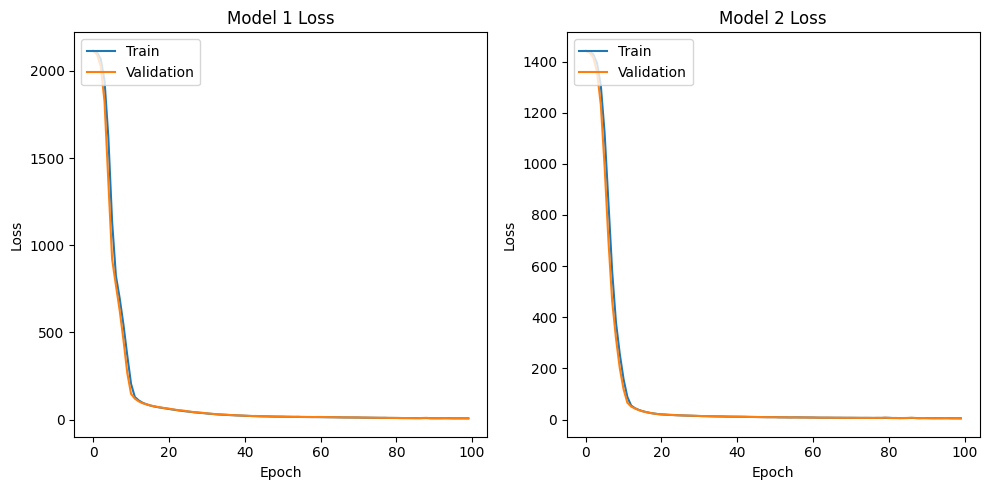

In [8]:
# Plot training & validation loss values for model 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for model 2
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [9]:
# # Simpan model pertama
# model.save('../models/calories_model')

# # Simpan model kedua
# model2.save('../models/bmr_model')


## Test Model

In [11]:
def output_model(age, height, weight, gender, activity_level):
    try:
        # Calculate BMI
        BMI = weight / ((height / 100) ** 2)

        # Predict BMR
        BMR_input = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender]
        })
        BMR_scaled = scaler2.transform(BMR_input)
        BMR = model2.predict(BMR_scaled)[0][0]

        # Create the full input DataFrame
        input_data = pd.DataFrame({
            'age': [age],
            'height(cm)': [height],
            'weight(kg)': [weight],
            'gender': [gender],
            'BMI': [BMI],
            'BMR': [BMR],
            'activity_level': [activity_level]
        })

        # Scale the input data
        scaled_input = scaler.transform(input_data)

        # Make predictions using the main model
        calories_predicted = model.predict(scaled_input)

        return calories_predicted[0][0]

    except Exception as e:
        return f"Error: {e}"

# Example usage (replace with user input)
age = float(input("Enter age: "))
height = float(input("Enter height(cm): "))
weight = float(input("Enter weight(kg): "))
gender = float(input("Enter gender (0 for male, 1 for female): "))
activity_level = float(input("Enter activity level: "))

# Call the function and print the output
result = output_model(age, height, weight, gender, activity_level)
print(f"Predicted daily calorie needs: {result:.2f}")

1/1 [==============================] - 0s 18ms/step
Predicted daily calorie needs: 3062.16
